In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math

In [2]:
def open_sed(filename, filetype, dimX, dimY, dimZ):
    fd = open(filename + filetype, 'rb')
    if filetype == '.raw' or filetype == '_noplate.raw':
        f = np.fromfile(fd, dtype=np.uint8)
        im = f.reshape((dimZ, dimY, dimX))   
       # print(im[86,1,:])
        slice = im[28,:,:]
    elif filetype == '.sed' or filetype == '.sumsed':
        f = np.fromfile(fd, dtype=np.float64, sep=' ')
        im = f.reshape((dimZ, dimY, dimX))   
       # print(im[88,1,:])
        slice = im[27,:,:]
    
    fd.close()
    
    return slice

In [60]:
file = 'F:\Visual Studio Programs\ITS-Wholebone-microCT-Bone Remodeling\E0016711_RT_MED_PLAT_10'
im_slice = open_sed(file,'.raw',93,75,31)
im_sed = open_sed(file,'.sed',91,73,29)
im_sumsed = open_sed(file,'.sumsed',91,73,29)
#im_PRslice = open_sed(file,'_noplate.raw',91,73,29)

In [61]:
 #print(im_slice[86,1,:])

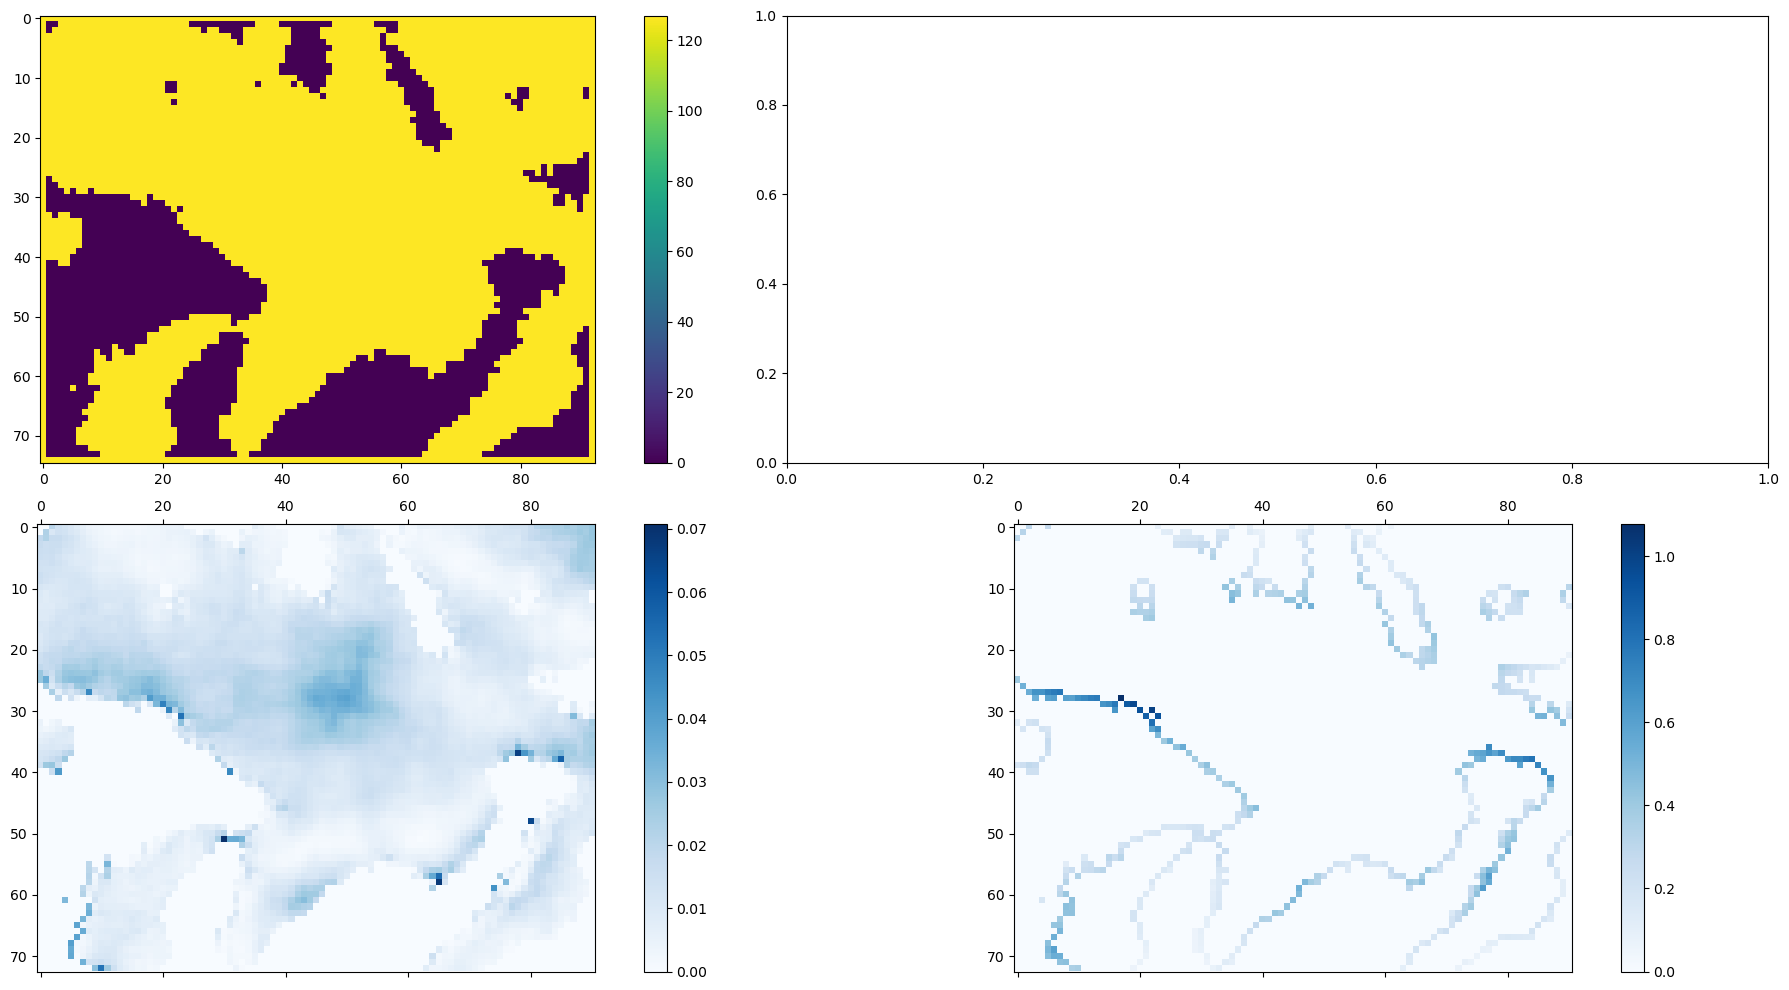

In [62]:
# To Do: Label each subplot

from matplotlib.colors import from_levels_and_colors

# plot colormap of SED value for slice above
plt.rcParams['figure.figsize'] = [20,10]
fig, ax = plt.subplots(2,2)

im0 = ax[0,0].imshow(im_slice[:,:])
fig.colorbar(im0, ax=ax[0,0])

# define color map 
#color_map = {0: np.array([255, 255, 255]),     # white
#             1: np.array([255, 0, 0]), # red
#             2: np.array([0, 255, 0])} # green
color_map = {0: np.array([255, 255, 255]),     # white
             1: np.array([255, 0, 0]), # red
             2: np.array([0, 0, 255])} # blue

# make a 3d numpy array that has a color channel dimension   
#data_3d = np.ndarray(shape=(im_PRslice.shape[0], im_PRslice.shape[1], 3), dtype=int)

#for i in range(0, im_PRslice.shape[0]):
#    for j in range(0, im_PRslice.shape[1]):
#        data_3d[i][j] = color_map[im_PRslice[i][j]]
        
#im1 = ax[0,1].imshow(data_3d)
#fig.colorbar(im1, ax=ax[0,1])

im2 = ax[1,0].matshow(im_sed[:,:], cmap=plt.cm.Blues)
fig.colorbar(im2, ax=ax[1,0])

im3 = ax[1,1].matshow(im_sumsed[:,:], cmap=plt.cm.Blues)
fig.colorbar(im3, ax=ax[1,1])

plt.tight_layout(h_pad=1)

# Write text overlaid with colormap
# for i in range(dimX):
#    for j in range(dimY):
#        c = im2d_sed[j,i]
#        ax.text(i,j,str(c),va='center',ha='center')

In [63]:
plt.rcParams['figure.figsize'] = [40,20]

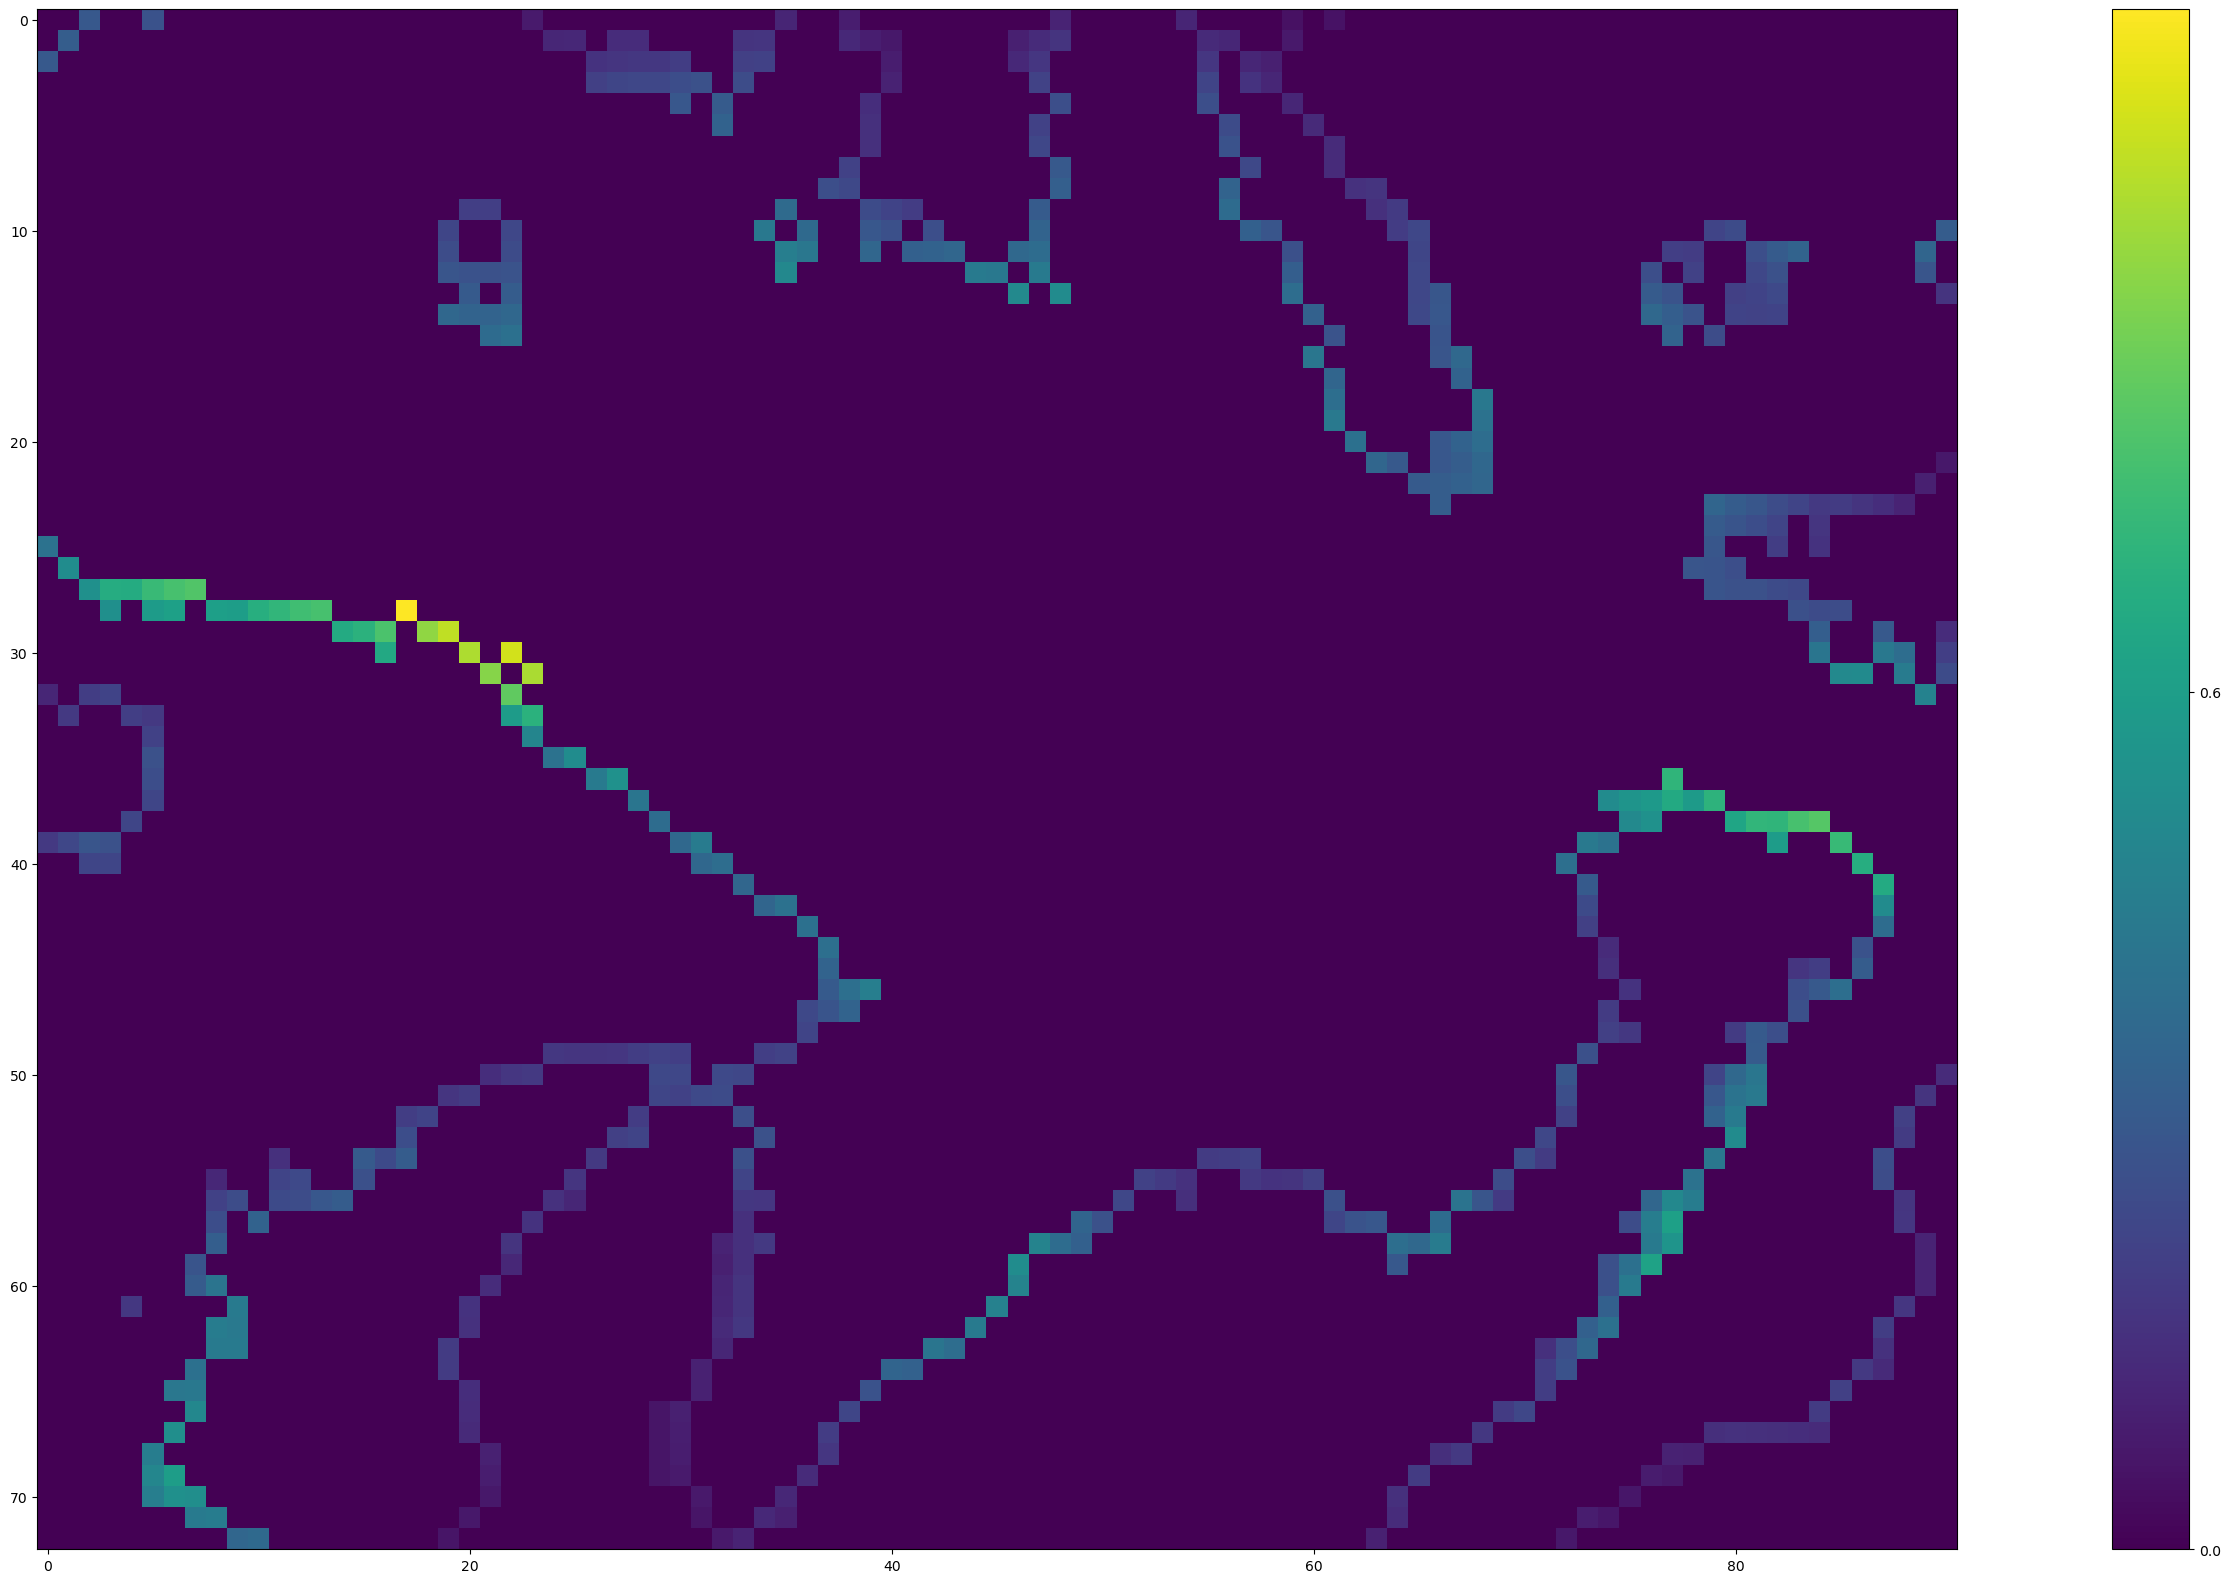

In [64]:
fig, ax = plt.subplots()
im0 = plt.imshow(im_sumsed[:,:])
cbar = fig.colorbar(im0)
cbar_ticks = np.linspace(0.,6, num=11, endpoint=True)
cbar.set_ticks(cbar_ticks)

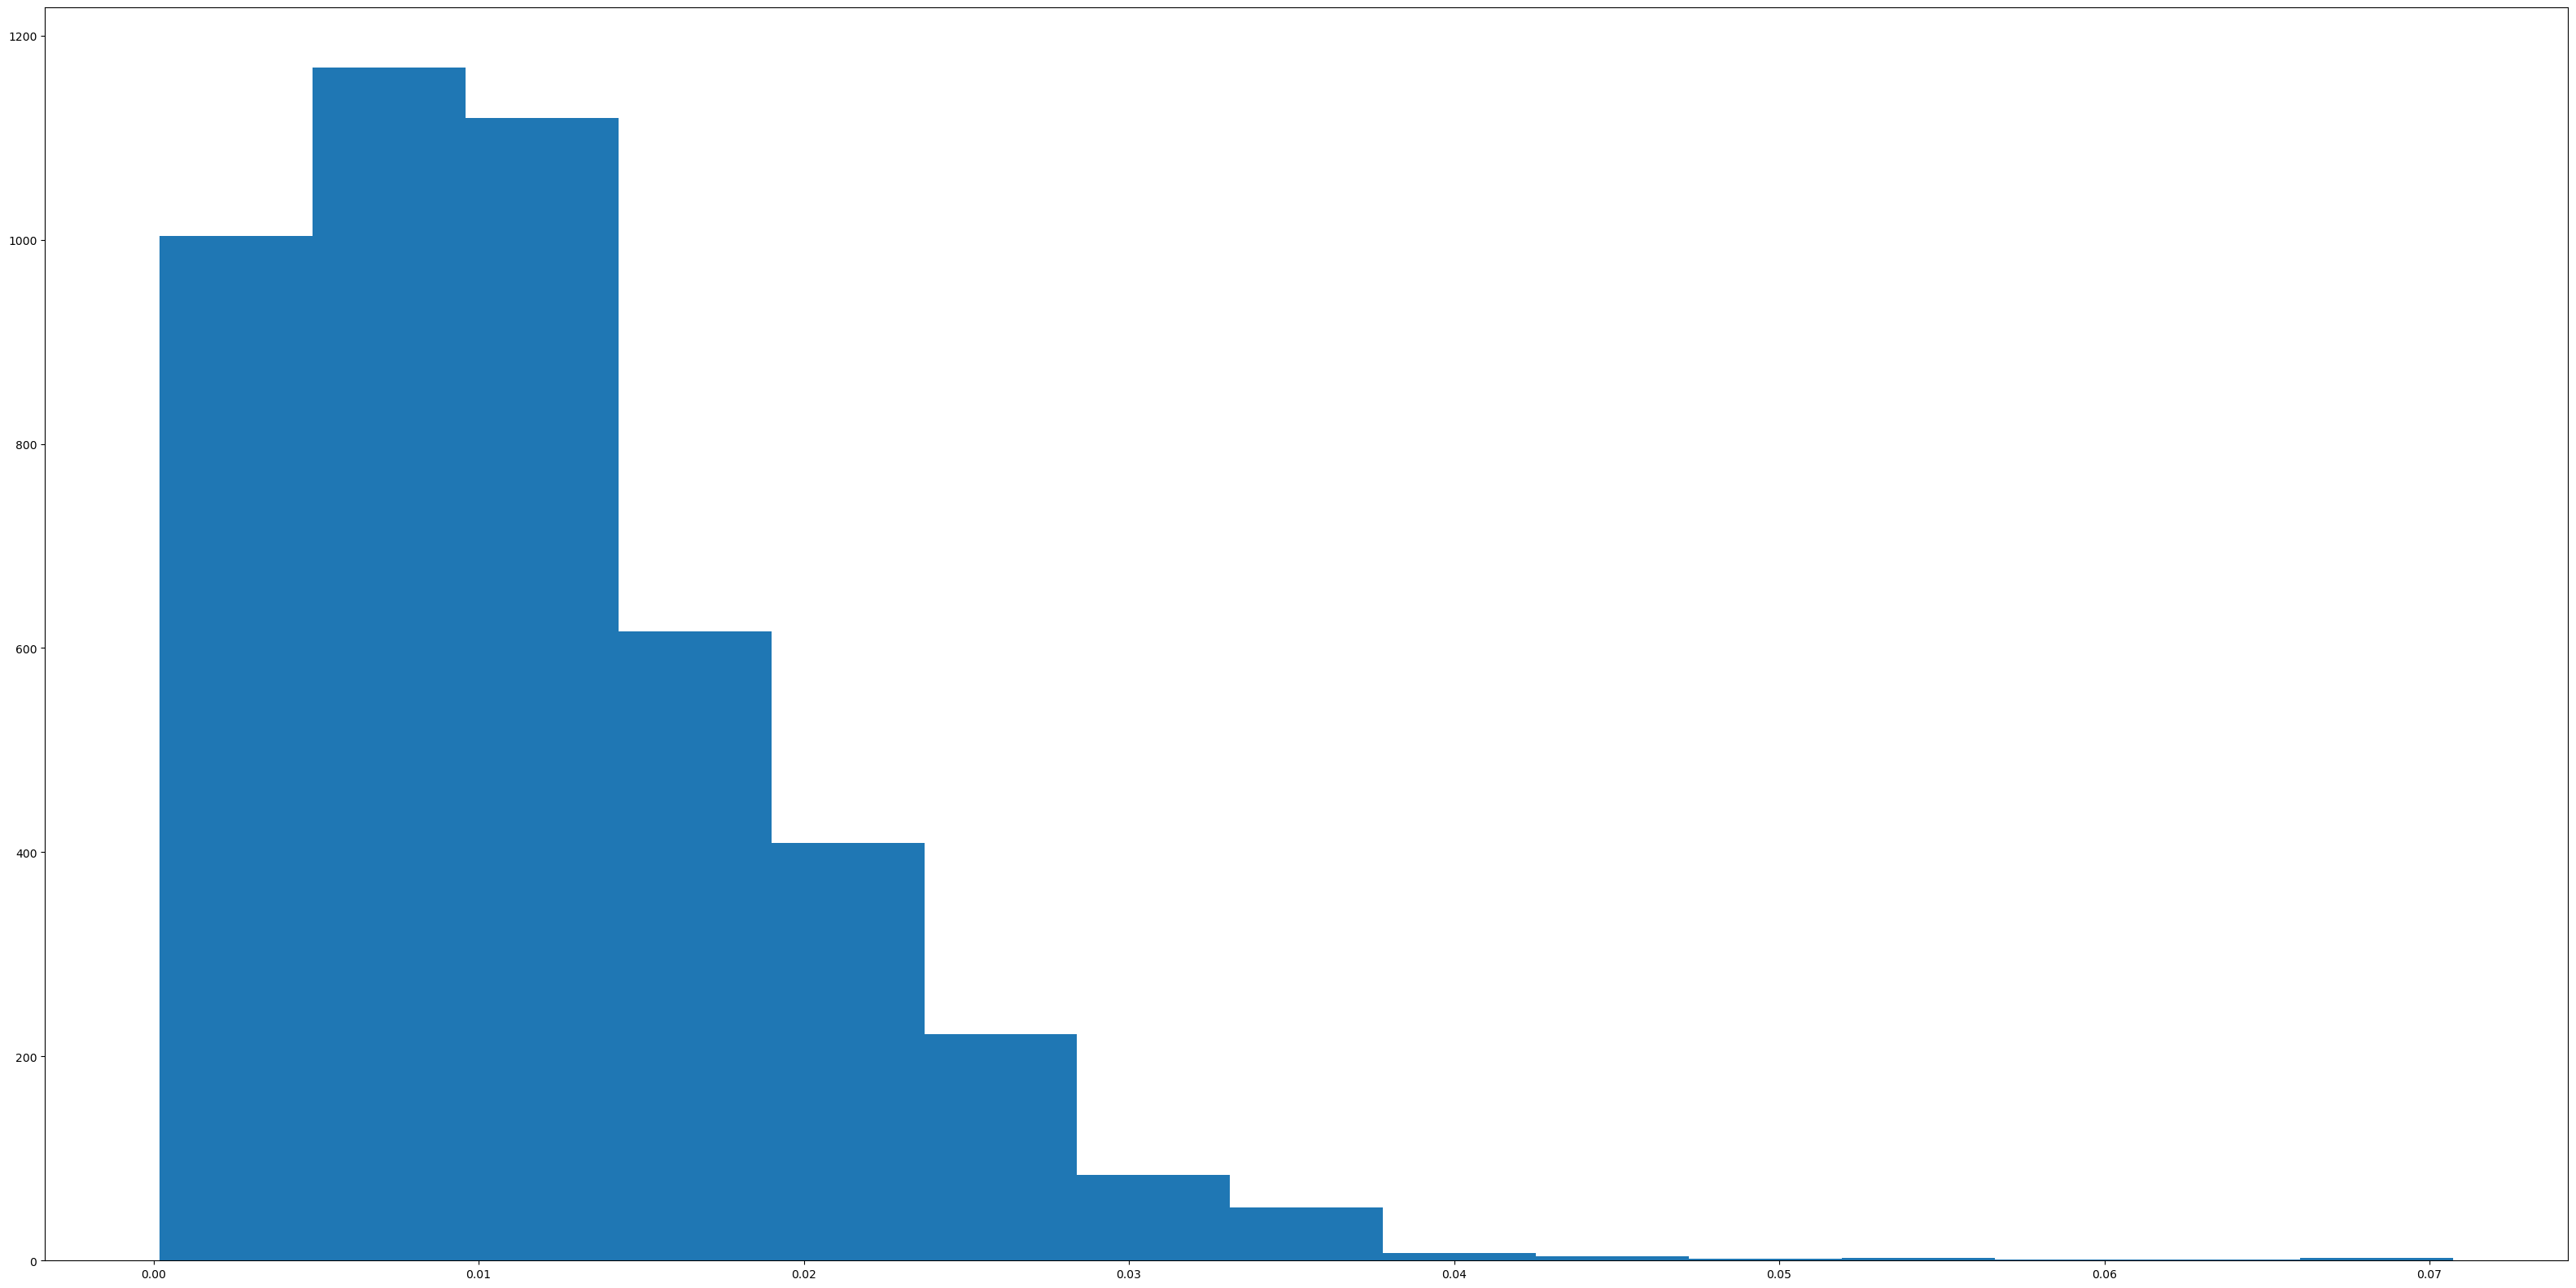

In [65]:
w = 5e-3
n = math.ceil((im_sed.max() - im_sed.min())/w)
ax = plt.hist(im_sed[im_sed>0], bins = n)

In [66]:
np.mean(im_sed[im_sed>0])

0.011638947402044294

In [67]:
np.median(im_sed[im_sed>0])

0.010239

In [68]:
np.percentile(im_sed[im_sed>0],90)

0.022426500000000002

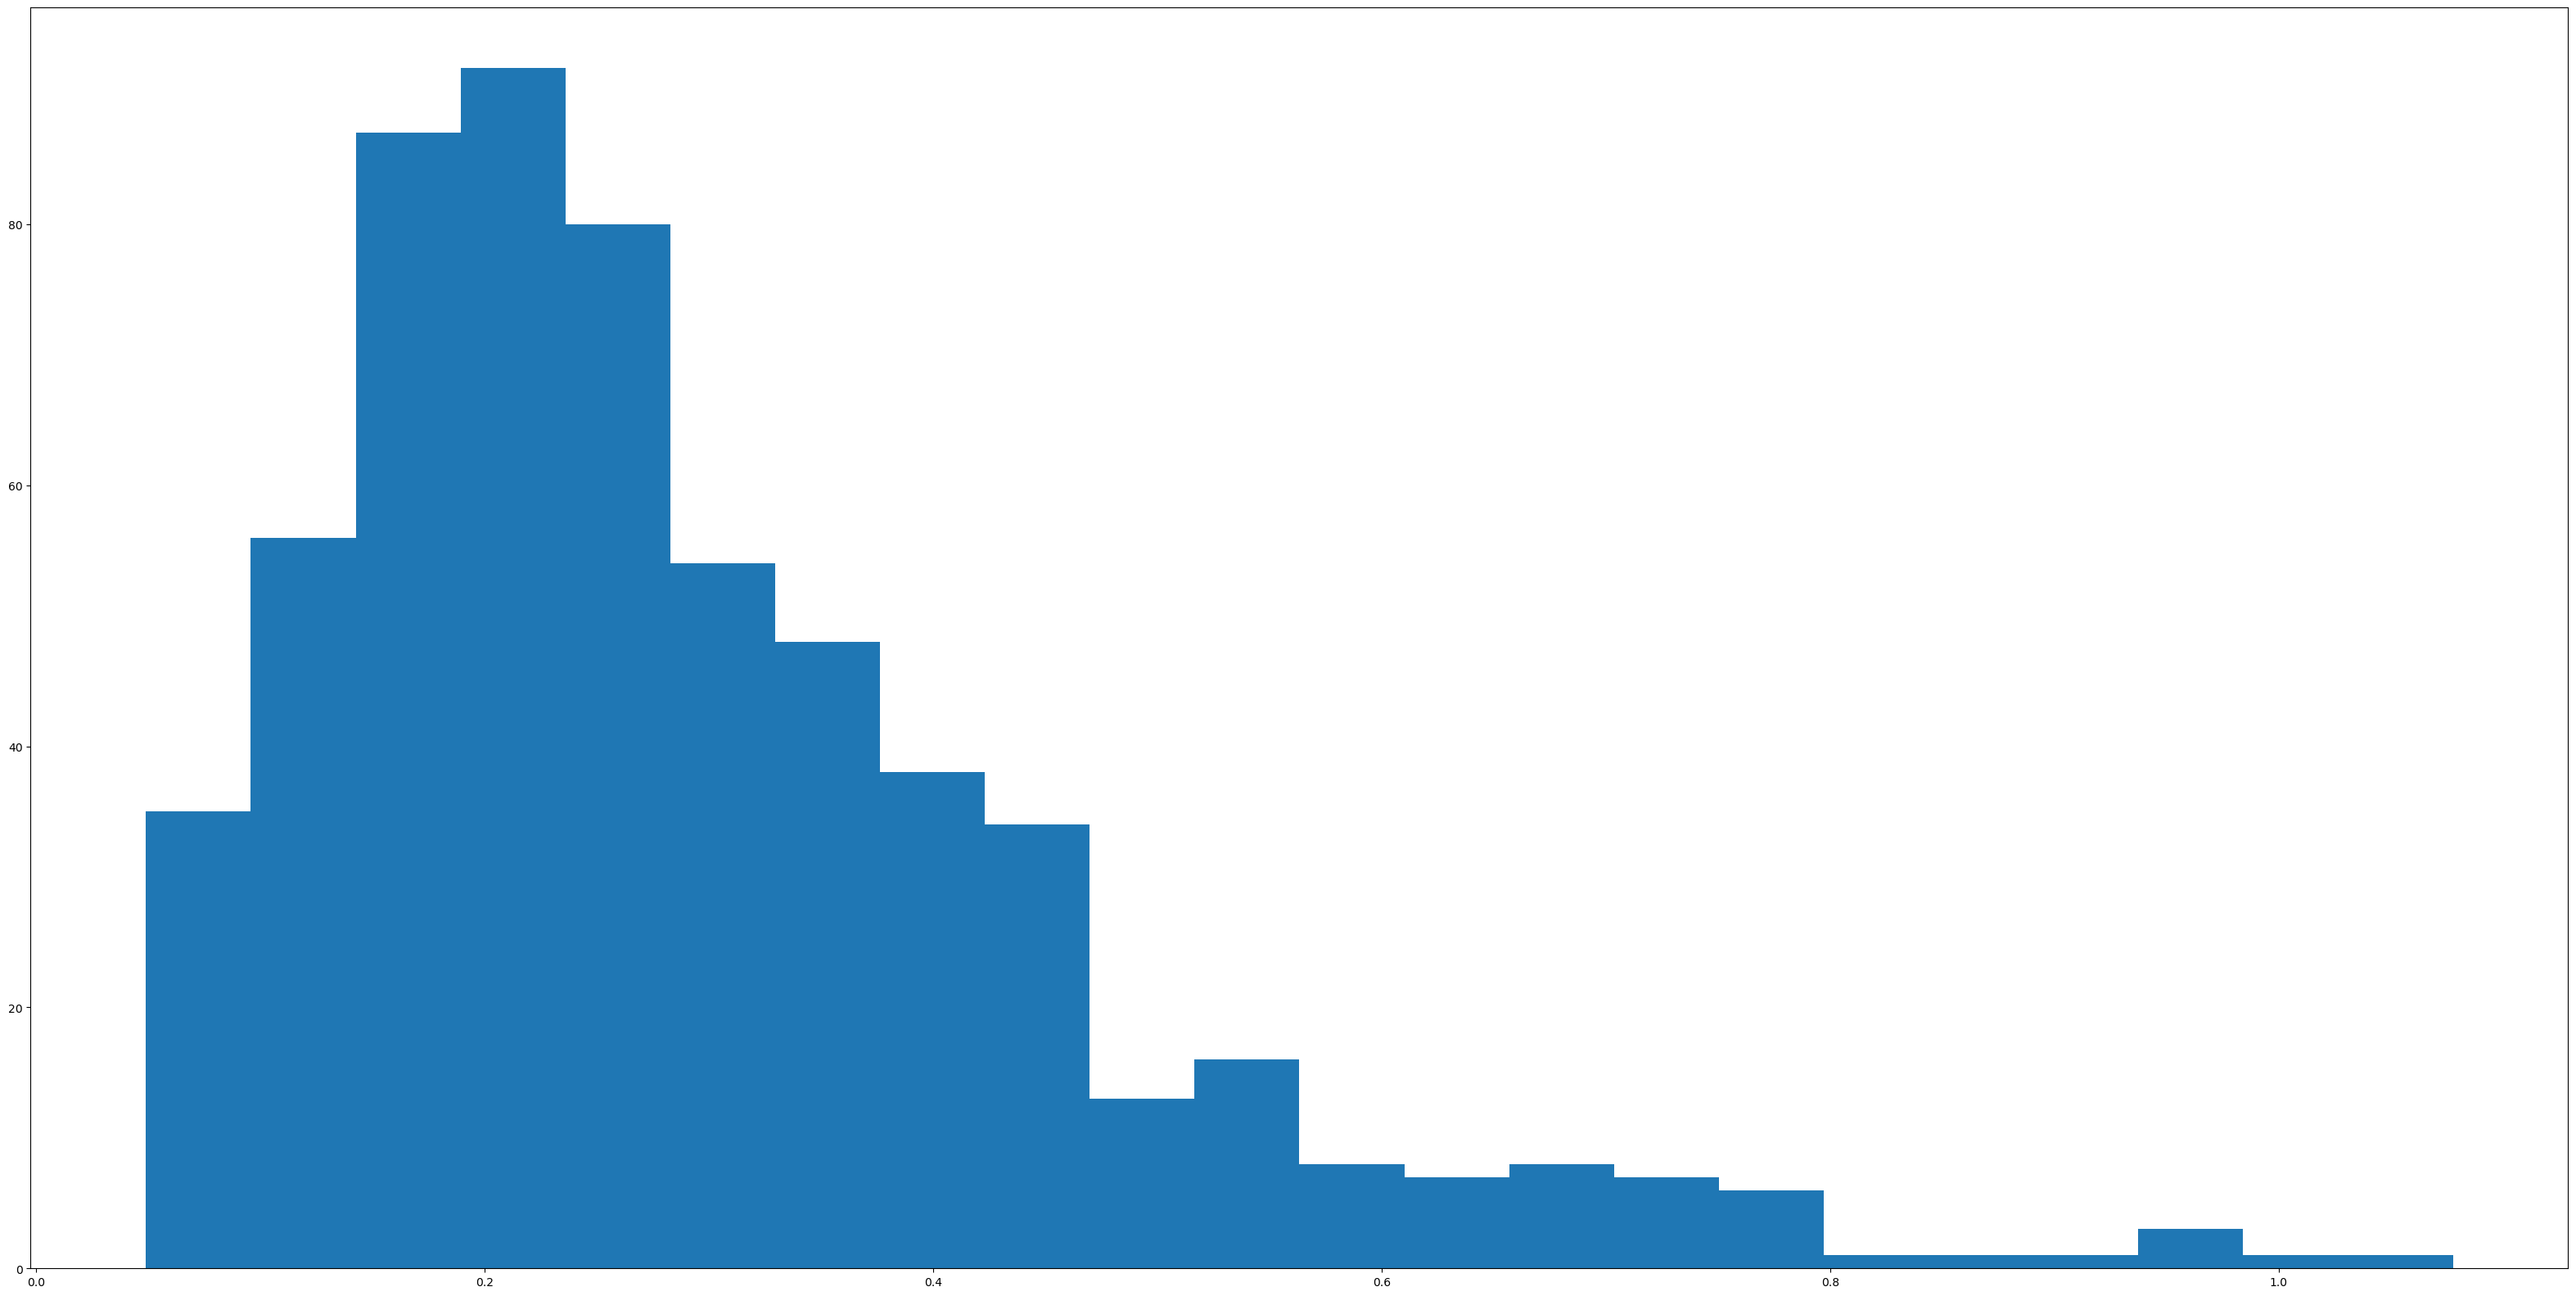

In [69]:
#w = 5
w = 0.05
n = math.ceil((im_sumsed.max() - im_sumsed.min())/w)
ax = plt.hist(im_sumsed[im_sumsed>0], bins = n)

In [70]:
np.mean(im_sumsed[im_sumsed>0])

0.2923726398659966

In [71]:
np.median(im_sumsed[im_sumsed>0])

0.254588

In [72]:
np.max(im_sumsed[im_sumsed>0])

1.077781